In [1]:
import argparse
import pdb

from builder import build
from util import DEFAULTS

In [2]:
# Parse arguments
parser = argparse.ArgumentParser(description='Arguments for building a model that satisfies a set of geometry constraints')

# General arguments
parser.add_argument('--problem', '-p', action='store', type=str, help='Name of the file defining the set of constraints')
parser.add_argument('--dir', '-d', action='store', type=str, help='Directory containing problem files.')
parser.add_argument('--regularize_points', action='store', dest='regularize_points', type=float, default=DEFAULTS["regularize_points"])
parser.add_argument('--make_distinct', action='store', dest='make_distinct', type=float, default=DEFAULTS["make_distinct"])
parser.add_argument('--distinct_prob', action='store', dest='distinct_prob', type=float, default=DEFAULTS["distinct_prob"])
parser.add_argument('--min_dist', action='store', dest='min_dist', type=float, default=DEFAULTS["min_dist"])
parser.add_argument('--ndg_loss', action='store', dest='ndg_loss', type=float, default=DEFAULTS["ndg_loss"])

parser.add_argument('--n_models', action='store', dest='n_models', type=int, default=DEFAULTS['n_models'])
parser.add_argument('--n_tries', action='store', dest='n_tries', type=int, default=DEFAULTS['n_tries'])
parser.add_argument('--n_inits', action='store', dest='n_inits', type=int, default=DEFAULTS['n_inits'])
parser.add_argument('--verbosity', action='store', dest='verbosity', type=int, default=DEFAULTS['verbosity'])
parser.add_argument('--enforce_goals', dest='enforce_goals', action='store_true')
parser.add_argument('--plot_freq', action='store', dest='plot_freq', type=int, default=DEFAULTS['plot_freq'])
parser.add_argument('--loss_freq', action='store', dest='loss_freq', type=int, default=DEFAULTS['loss_freq'])
parser.add_argument('--losses_freq', action='store', dest='losses_freq', type=int, default=DEFAULTS['losses_freq'])

parser.add_argument('--unnamed_objects', dest='unnamed_objects', action='store_true')
parser.add_argument('--no_unnamed_objects', dest='unnamed_objects', action='store_false')
parser.set_defaults(unnamed_objects=True)

# Tensorflow arguments
parser.add_argument('--learning_rate', action='store', dest='learning_rate', type=float, default=DEFAULTS["learning_rate"])
parser.add_argument('--decay_steps', action='store', dest='decay_steps', type=float, default=DEFAULTS["decay_steps"])
parser.add_argument('--decay_rate', action='store', dest='decay_rate', type=float, default=DEFAULTS["decay_rate"])
parser.add_argument('--n_iterations', action='store', dest='n_iterations', type=int, default=DEFAULTS["n_iterations"])
parser.add_argument('--eps', action='store', dest='eps', type=float, default=DEFAULTS["eps"])

parser.add_argument('--experiment', dest='experiment', action='store_true')

parser.add_argument("--f", type=str, default='abc.def')


args = parser.parse_args()
args = vars(args)

In [28]:
args['problem'] = 'example_test.smt2'

args['n_tries'] = 10
args['eps'] = 1e-4
args['n_iterations'] = 10000

lines = open(args['problem'], 'r').readlines()
args['lines'] = ['(param A point)', '(param B point)', '(define AB line (line A B))', '(param C point)', '(param D point)', '(define Cd line (line C D))', '(assert (para AB Cd))', '(param E point (on-line AB))', '(define EF line (perp-at E AB))', '(define F point (inter-ll EF Cd))', '(assert (perp EF AB))', '(assert (perp EF Cd))', '(param M point (on-line Cd))', '(define EM line (line E M))', '(assert (= (uangle D M E) (div (mul 55 pi) 180)))', '(eval (= (uangle F E M) (div (mul 35 pi) 180)))']


args['lines']

['(param A point)',
 '(param B point)',
 '(define AB line (line A B))',
 '(param C point)',
 '(param D point)',
 '(define Cd line (line C D))',
 '(assert (para AB Cd))',
 '(param E point (on-line AB))',
 '(define EF line (perp-at E AB))',
 '(define F point (inter-ll EF Cd))',
 '(assert (perp EF AB))',
 '(assert (perp EF Cd))',
 '(param M point (on-line Cd))',
 '(define EM line (line E M))',
 '(assert (= (uangle D M E) (div (mul 55 pi) 180)))',
 '(eval (= (uangle F E M) (div (mul 35 pi) 180)))']

Processing instructions...:   6%|▋         | 1/16 [00:00<00:01,  9.89it/s]

INPUT INSTRUCTIONS:
parameterize A coords
parameterize B coords
define AB ((connecting A B))
parameterize C coords
parameterize D coords
define Cd ((connecting C D))
assert (para AB Cd)
parameterize E (on-line AB)
define EF ((perp-at E AB))
define F ((inter-ll EF Cd))
assert (perp EF AB)
assert (perp EF Cd)
parameterize M (on-line Cd)
define EM ((connecting E M))
assert (eq-n (uangle D M E) (div (mul 55.0 3.141592653589793) 180.0))
eval (eq-n (uangle F E M) (div (mul 35.0 3.141592653589793) 180.0))


Sampling initializations...: 100%|██████████| 10/10 [00:38<00:00,  3.81s/it]


[     0]   0.342393195160 ||   0.100000
======== Print losses ==========
-- Losses --
  para_AB_Cd                                         0.0576768909
  E_line_regularization                              0.0001796399
  perp_EF_AB                                         0.0000000000
  perp_EF_Cd                                         0.0576772350
  M_line_regularization                              0.0001814080
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.2266509987
  points                                             0.0000112449
  distinct                                           0.0000157778
-- Goals --
  eq-n_(uangle F E M)_(div (mul 35.0 3.141592653589793) 180.0) 0.2531304246
-- NDGs --


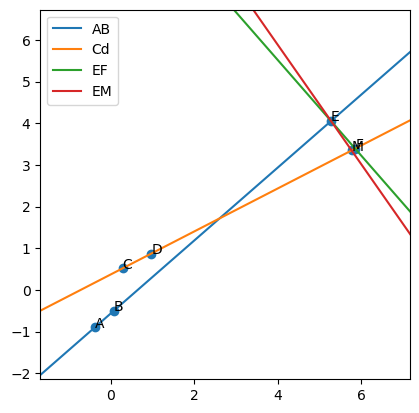

[   100]   0.005748756497 ||   0.096496
[   200]   0.000661994611 ||   0.093115
[   300]   0.000631753246 ||   0.089852
[   400]   0.000626916532 ||   0.086704
[   500]   0.000621524442 ||   0.083666
[   600]   0.000615666603 ||   0.080734
[   700]   0.000609411516 ||   0.077906
[   800]   0.000602813931 ||   0.075176
[   900]   0.000597153551 ||   0.072542
[  1000]   0.000589969184 ||   0.070000
======== Print losses ==========
-- Losses --
  para_AB_Cd                                         0.0000000001
  E_line_regularization                              0.0002621301
  perp_EF_AB                                         0.0000000000
  perp_EF_Cd                                         0.0000000001
  M_line_regularization                              0.0003125268
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000000003
  points                                             0.0000152827
  distinct                                           0.0000000292
-- Goals --
  eq

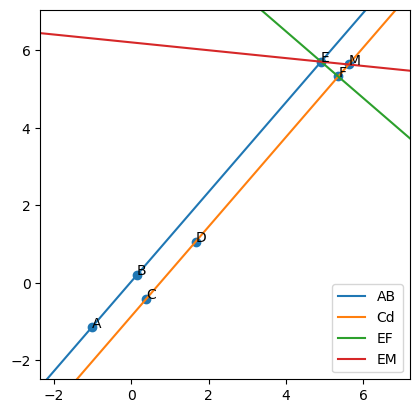

[  1100]   0.000582728764 ||   0.067547
[  1200]   0.000575292030 ||   0.065180
[  1300]   0.000567683091 ||   0.062897
[  1400]   0.000663902423 ||   0.060693
[  1500]   0.000552543869 ||   0.058566
[  1600]   0.000544579789 ||   0.056514
[  1700]   0.000542710013 ||   0.054534
[  1800]   0.000528879891 ||   0.052623
[  1900]   0.000521345641 ||   0.050779
[  2000]   0.000565706617 ||   0.049000
======== Print losses ==========
-- Losses --
  para_AB_Cd                                         0.0000008599
  E_line_regularization                              0.0002258142
  perp_EF_AB                                         0.0000000000
  perp_EF_Cd                                         0.0000008612
  M_line_regularization                              0.0002725037
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000514414
  points                                             0.0000142164
  distinct                                           0.0000000099
-- Goals --
  eq

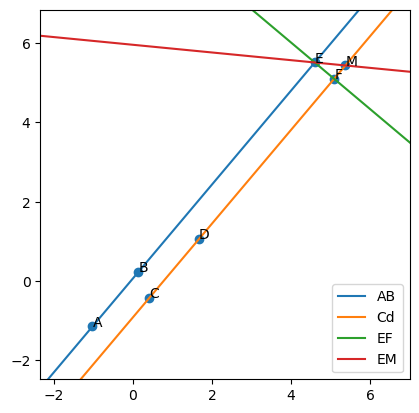

[  2100]   0.000506046626 ||   0.047283
[  2200]   0.000496542261 ||   0.045626
[  2300]   0.000639156093 ||   0.044028
[  2400]   0.000480596975 ||   0.042485
[  2500]   0.000472502882 ||   0.040996
[  2600]   0.000564453193 ||   0.039560
[  2700]   0.000456653135 ||   0.038174
[  2800]   0.000448829043 ||   0.036836
[  2900]   0.000442600013 ||   0.035545
[  3000]   0.000433104716 ||   0.034300
======== Print losses ==========
-- Losses --
  para_AB_Cd                                         0.0000000006
  E_line_regularization                              0.0001885156
  perp_EF_AB                                         0.0000000000
  perp_EF_Cd                                         0.0000000007
  M_line_regularization                              0.0002315280
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000000748
  points                                             0.0000129829
  distinct                                           0.0000000022
-- Goals --
  eq

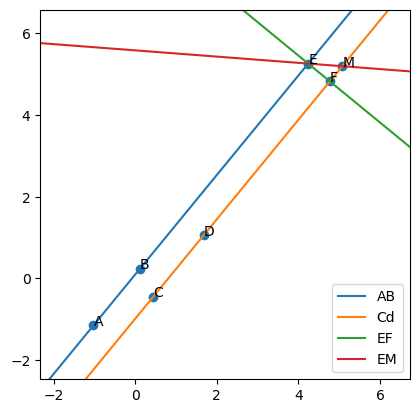

[  3100]   0.000425481352 ||   0.033098
[  3200]   0.000417687106 ||   0.031938
[  3300]   0.000410215914 ||   0.030819
[  3400]   0.000402624935 ||   0.029739
[  3500]   0.000438131940 ||   0.028697
[  3600]   0.000387935526 ||   0.027692
[  3700]   0.000525398599 ||   0.026722
[  3800]   0.000373720706 ||   0.025785
[  3900]   0.000371858870 ||   0.024882
[  4000]   0.000360470950 ||   0.024010
======== Print losses ==========
-- Losses --
  para_AB_Cd                                         0.0000000293
  E_line_regularization                              0.0001548248
  perp_EF_AB                                         0.0000000000
  perp_EF_Cd                                         0.0000000291
  M_line_regularization                              0.0001931263
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000007681
  points                                             0.0000116926
  distinct                                           0.0000000007
-- Goals --
  eq

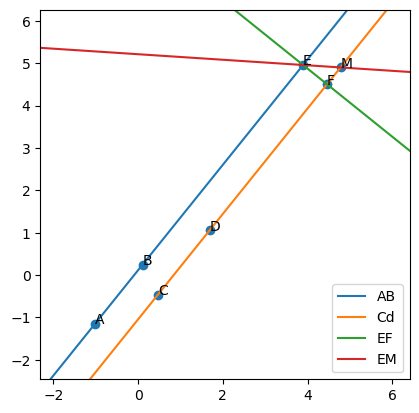

[  4100]   0.000354868415 ||   0.023169
[  4200]   0.000346641081 ||   0.022357
[  4300]   0.000340318594 ||   0.021574
[  4400]   0.000333111305 ||   0.020818
[  4500]   0.000336877032 ||   0.020088
[  4600]   0.000320439134 ||   0.019384
[  4700]   0.000391040032 ||   0.018705
[  4800]   0.000308249971 ||   0.018050
[  4900]   0.000302459566 ||   0.017417
[  5000]   0.000296575710 ||   0.016807
======== Print losses ==========
-- Losses --
  para_AB_Cd                                         0.0000000002
  E_line_regularization                              0.0001263761
  perp_EF_AB                                         0.0000000000
  perp_EF_Cd                                         0.0000000002
  M_line_regularization                              0.0001597305
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000000263
  points                                             0.0000104421
  distinct                                           0.0000000004
-- Goals --
  eq

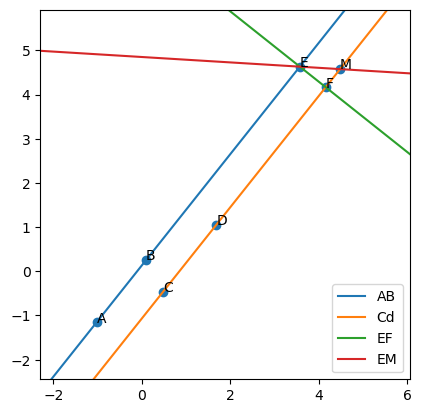

[  5100]   0.000292529129 ||   0.016218
[  5200]   0.000317967998 ||   0.015650
[  5300]   0.000279883706 ||   0.015101
[  5400]   0.000277883115 ||   0.014572
[  5500]   0.000275554620 ||   0.014062
[  5600]   0.000264197779 ||   0.013569
[  5700]   0.000263143997 ||   0.013094
[  5800]   0.000254531347 ||   0.012635
[  5900]   0.000249529364 ||   0.012192
[  6000]   0.000244778960 ||   0.011765
======== Print losses ==========
-- Losses --
  para_AB_Cd                                         0.0000000027
  E_line_regularization                              0.0001031883
  perp_EF_AB                                         0.0000000000
  perp_EF_Cd                                         0.0000000026
  M_line_regularization                              0.0001322529
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000000299
  points                                             0.0000093023
  distinct                                           0.0000000003
-- Goals --
  eq

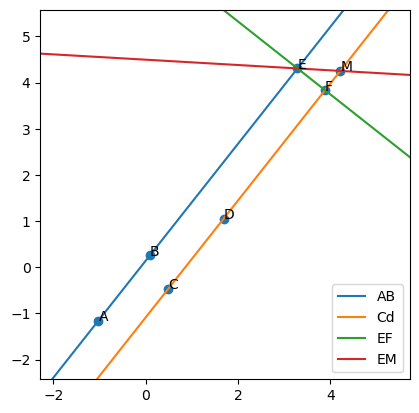

[  6100]   0.000240181017 ||   0.011353
[  6200]   0.000236838139 ||   0.010955
[  6300]   0.000231518520 ||   0.010571
[  6400]   0.000227066551 ||   0.010201
[  6500]   0.000227025165 ||   0.009843
[  6600]   0.000218713881 ||   0.009498
[  6700]   0.000214731136 ||   0.009166
[  6800]   0.000211805822 ||   0.008844
[  6900]   0.000206918466 ||   0.008534
[  7000]   0.000207037780 ||   0.008235
======== Print losses ==========
-- Losses --
  para_AB_Cd                                         0.0000000658
  E_line_regularization                              0.0000847328
  perp_EF_AB                                         0.0000000000
  perp_EF_Cd                                         0.0000000662
  M_line_regularization                              0.0001101086
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000037644
  points                                             0.0000082997
  distinct                                           0.0000000002
-- Goals --
  eq

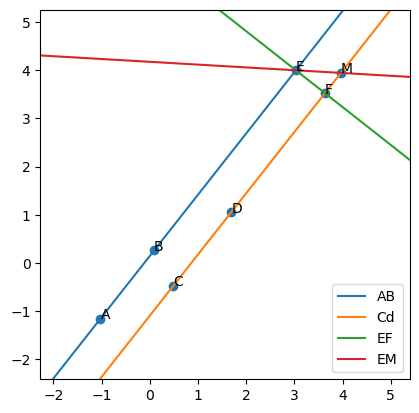

[  7100]   0.000199540383 ||   0.007947
[  7200]   0.000195885063 ||   0.007668
[  7300]   0.000200402984 ||   0.007400
[  7400]   0.000188933737 ||   0.007140
[  7500]   0.000185644465 ||   0.006890
[  7600]   0.000187838202 ||   0.006649
[  7700]   0.000179060199 ||   0.006416
[  7800]   0.000176178005 ||   0.006191
[  7900]   0.000177504465 ||   0.005974
[  8000]   0.000169793402 ||   0.005765
======== Print losses ==========
-- Losses --
  para_AB_Cd                                         0.0000000000
  E_line_regularization                              0.0000699846
  perp_EF_AB                                         0.0000000000
  perp_EF_Cd                                         0.0000000000
  M_line_regularization                              0.0000923768
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000000031
  points                                             0.0000074287
  distinct                                           0.0000000002
-- Goals --
  eq

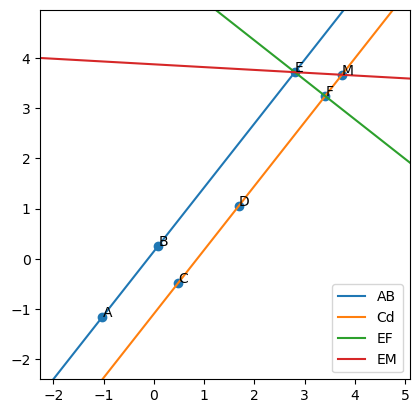

[  8100]   0.000166840101 ||   0.005563
[  8200]   0.000170203154 ||   0.005368
[  8300]   0.000161129281 ||   0.005180
[  8400]   0.000158374924 ||   0.004998
[  8500]   0.000156137235 ||   0.004823
[  8600]   0.000153019377 ||   0.004654
[  8700]   0.000150396673 ||   0.004491
[  8800]   0.000148420713 ||   0.004334
[  8900]   0.000145890972 ||   0.004182
[  9000]   0.000142910571 ||   0.004035
======== Print losses ==========
-- Losses --
  para_AB_Cd                                         0.0000000002
  E_line_regularization                              0.0000581783
  perp_EF_AB                                         0.0000000000
  perp_EF_Cd                                         0.0000000002
  M_line_regularization                              0.0000780395
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000000151
  points                                             0.0000066770
  distinct                                           0.0000000002
-- Goals --
  eq

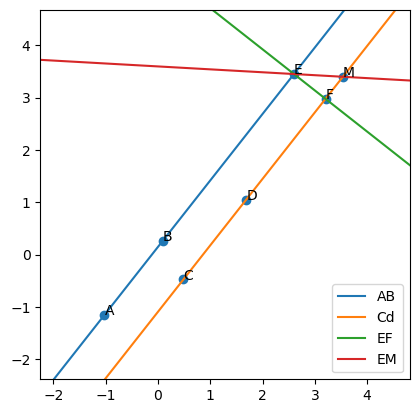

[  9100]   0.000140547916 ||   0.003894
[  9200]   0.000138763334 ||   0.003758
[  9300]   0.000136119443 ||   0.003626
[  9400]   0.000133615047 ||   0.003499
[  9500]   0.000131422265 ||   0.003376
[  9600]   0.000129491810 ||   0.003258
[  9700]   0.000129094378 ||   0.003144
[  9800]   0.000125363351 ||   0.003034
[  9900]   0.000123030554 ||   0.002927
[     0]   0.885442895104 ||   0.100000
======== Print losses ==========
-- Losses --
  para_AB_Cd                                         0.0111502143
  E_line_regularization                              0.0002089935
  perp_EF_AB                                         0.0000000000
  perp_EF_Cd                                         0.0111501870
  M_line_regularization                              0.0002403116
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.8626825572
  points                                             0.0000103936
  distinct                                           0.0000002379
-- Goals --
  eq

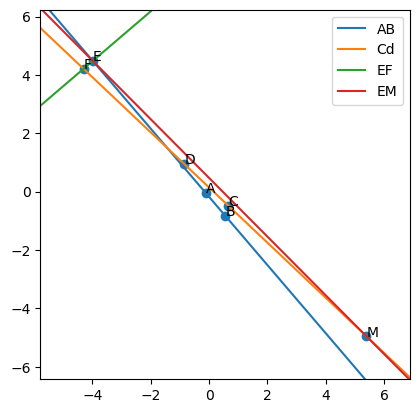

[   100]   0.001344373130 ||   0.096496
[   200]   0.000978958647 ||   0.093115
[   300]   0.000961728266 ||   0.089852
[   400]   0.000941870620 ||   0.086704
[   500]   0.000919979282 ||   0.083666
[   600]   0.000896496055 ||   0.080734
[   700]   0.000871767014 ||   0.077906
[   800]   0.000846075011 ||   0.075176
[   900]   0.000819657551 ||   0.072542
[  1000]   0.000792717664 ||   0.070000
======== Print losses ==========
-- Losses --
  para_AB_Cd                                         0.0000000013
  E_line_regularization                              0.0002579035
  perp_EF_AB                                         0.0000000000
  perp_EF_Cd                                         0.0000000013
  M_line_regularization                              0.0005164459
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000000043
  points                                             0.0000183614
  distinct                                           0.0000000000
-- Goals --
  eq

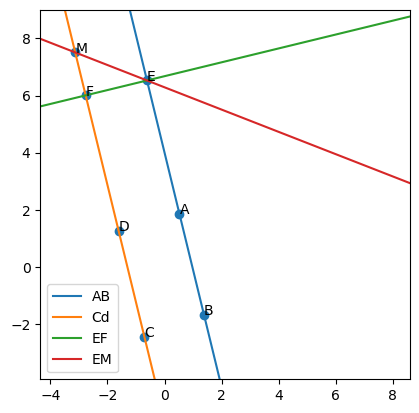

[  1100]   0.000765431019 ||   0.067547
[  1200]   0.000737950847 ||   0.065180
[  1300]   0.000710411517 ||   0.062897
[  1400]   0.000682931222 ||   0.060693
[  1500]   0.000655614072 ||   0.058566
[  1600]   0.000628551757 ||   0.056514
[  1700]   0.000601824904 ||   0.054534
[  1800]   0.000575504215 ||   0.052623
[  1900]   0.000549651432 ||   0.050779
[  2000]   0.000524320165 ||   0.049000
======== Print losses ==========
-- Losses --
  para_AB_Cd                                         0.0000000002
  E_line_regularization                              0.0001721372
  perp_EF_AB                                         0.0000000000
  perp_EF_Cd                                         0.0000000002
  M_line_regularization                              0.0003370271
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000000013
  points                                             0.0000151541
  distinct                                           0.0000000000
-- Goals --
  eq

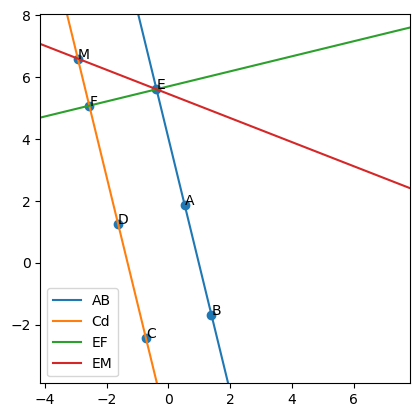

[  2100]   0.000499556620 ||   0.047283
[  2200]   0.000475400246 ||   0.045626
[  2300]   0.000451884315 ||   0.044028
[  2400]   0.000429036439 ||   0.042485
[  2500]   0.000406879050 ||   0.040996
[  2600]   0.000385429833 ||   0.039560
[  2700]   0.000364702132 ||   0.038174
[  2800]   0.000344705314 ||   0.036836
[  2900]   0.000325445121 ||   0.035545
[  3000]   0.000306923985 ||   0.034300
======== Print losses ==========
-- Losses --
  para_AB_Cd                                         0.0000000000
  E_line_regularization                              0.0000972647
  perp_EF_AB                                         0.0000000000
  perp_EF_Cd                                         0.0000000000
  M_line_regularization                              0.0001982805
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000000003
  points                                             0.0000113785
  distinct                                           0.0000000000
-- Goals --
  eq

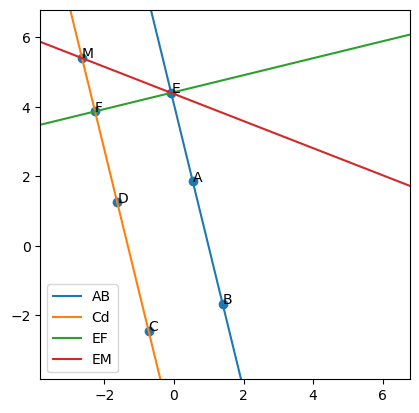

[  3100]   0.000289141331 ||   0.033098
[  3200]   0.000272093854 ||   0.031938
[  3300]   0.000255775780 ||   0.030819
[  3400]   0.000240179110 ||   0.029739
[  3500]   0.000225293852 ||   0.028697
[  3600]   0.000211108232 ||   0.027692
[  3700]   0.000197608897 ||   0.026722
[  3800]   0.000184781104 ||   0.025785
[  3900]   0.000172608897 ||   0.024882
[  4000]   0.000161075274 ||   0.024010
======== Print losses ==========
-- Losses --
  para_AB_Cd                                         0.0000000000
  E_line_regularization                              0.0000457089
  perp_EF_AB                                         0.0000000000
  perp_EF_Cd                                         0.0000000000
  M_line_regularization                              0.0001074745
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000000000
  points                                             0.0000078919
  distinct                                           0.0000000000
-- Goals --
  eq

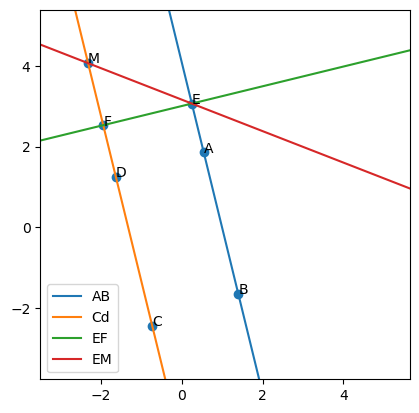

[  4100]   0.000150162342 ||   0.023169
[  4200]   0.000139851460 ||   0.022357
[  4300]   0.000130123384 ||   0.021574
[  4400]   0.000120958386 ||   0.020818
[  4500]   0.000112336458 ||   0.020088
[  4600]   0.000104255432 ||   0.019384
======== Print losses ==========
-- Losses --
  para_AB_Cd                                         0.0000000000
  E_line_regularization                              0.0000245617
  perp_EF_AB                                         0.0000000000
  perp_EF_Cd                                         0.0000000000
  M_line_regularization                              0.0000692309
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000000000
  points                                             0.0000060735
  distinct                                           0.0000001301
-- Goals --
  eq-n_(uangle F E M)_(div (mul 35.0 3.141592653589793) 180.0) 0.0000000000
-- NDGs --


Found 1 models


In [29]:
res = build(args)

In [16]:
for item in res[0]:
    print(item)

(param (A B C) (right-tri A))

(define D point (foot A (line B C)))

(define I1 point (incenter A B D))

(define I2 point (incenter A C D))

(define IL line (line I1 I2))

(define K point (inter-ll IL (line A B)))

(define L point (inter-ll IL (line A C)))

(eval (gte (area A B C) (mul 2 (area A K L))))


In [14]:
for obj_name, obj in res[1][0].named_points.items():
    print(obj_name)
    print(obj)
    (x, y) = obj

for obj_name, obj in res[1][0].named_lines.items():
    print(obj_name)
    print(obj)
    (x, y), r = obj
    # slope = y/x, intercept = r

for obj_name, obj in res[1][0].named_circles.items():
    print(obj_name)
    print(obj)
    (x, y), r = obj

A
(coords -0.225156 0.513744)
B
(coords 0.465905 0.519153)
C
(coords -0.231666 1.332698)
D
(coords 0.175774 0.857519)
I1
(coords 0.160473 0.658154)
I2
(coords -0.060480 0.875651)
K
(coords 0.302978 0.517878)
L
(coords -0.229354 1.041885)
IL
LineNF(n=TfPoint(x=0.7015122212129571, y=0.7126574236537939), r=0.581612193773471)


In [21]:
for item in res[1][0]:
    print(item)

{<primitives.Point object at 0x0000019C294F2D00>: TfPoint(x=0.0016375923969264127, y=0.0008207096925415898), <primitives.Point object at 0x0000019C294F2AF0>: TfPoint(x=0.031305673459843274, y=-0.5265176564274066), <primitives.Point object at 0x0000019C294F2850>: TfPoint(x=0.5117032204120084, y=-0.13628874488150386), <primitives.Point object at 0x0000019C294F2460>: TfPoint(x=0.286769086333453, y=0.4454171318346195), <primitives.Point object at 0x0000019C294F2BB0>: TfPoint(x=-0.3335554471137083, y=0.4090015197260785), <primitives.Point object at 0x0000019C294F2640>: TfPoint(x=-0.48995264312064185, y=-0.19232428185472575)}
{}
{<primitives.Circle object at 0x0000019C294F2C40>: CircleNF(center=TfPoint(x=0.0016375923969264127, y=0.0008207096925415898), radius=0.5281722705860392)}
[]
[]
[]
[]
[]
{}
{'eq-n_(uangle A D E)_(div 3.141592653589793 5.0)': 4.0185117220724346e-06}


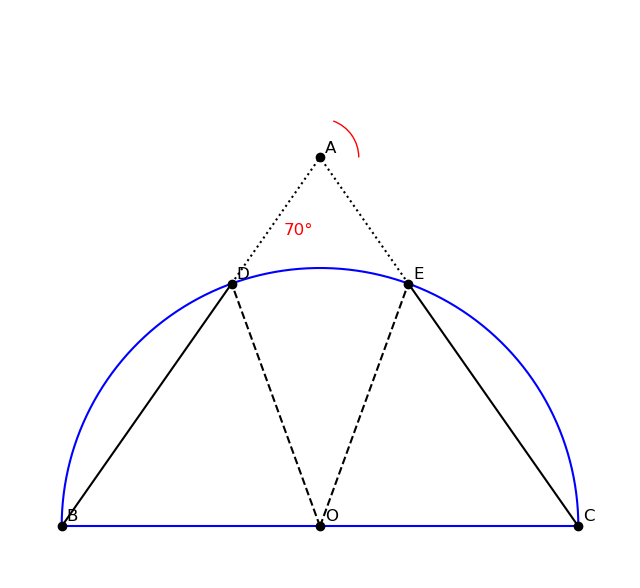

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Arc

# 设置角度和计算相关参数
theta_deg = 70
theta = np.deg2rad(theta_deg)
cos_theta = np.cos(theta)

# 计算A点坐标
h_squared = 25 * (1 + cos_theta) / (1 - cos_theta)
h = np.sqrt(h_squared)
A = (0, h)

# 计算D和E的坐标
t = 50 / (25 + h_squared)
d_x = -5 + 5 * t
d_y = h * t
e_x = 5 - 5 * t
e_y = h * t
D, E = (d_x, d_y), (e_x, e_y)

# 创建图形
fig, ax = plt.subplots(figsize=(8, 8))

# 绘制半圆和直径
theta_half = np.linspace(0, np.pi, 100)
ax.plot(5*np.cos(theta_half), 5*np.sin(theta_half), 'b')
ax.plot([-5, 5], [0, 0], 'b')

# 绘制各点
points = [(-5, 0, 'B'), (5, 0, 'C'), (0, 0, 'O'), 
          (d_x, d_y, 'D'), (e_x, e_y, 'E'), (0, h, 'A')]
for x, y, name in points:
    ax.plot(x, y, 'ko')
    ax.text(x+0.1, y+0.1, name, fontsize=12)

# 绘制线段
ax.plot([-5, d_x], [0, d_y], 'k')  # BD
ax.plot([5, e_x], [0, e_y], 'k')   # CE
ax.plot([0, d_x], [0, d_y], 'k--') # OD
ax.plot([0, e_x], [0, e_y], 'k--') # OE

# 绘制延长线
ax.plot([d_x, 0], [d_y, h], 'k:') # DA
ax.plot([e_x, 0], [e_y, h], 'k:') # EA

# 标注70度角
arc = Arc(A, 1.5, 1.5, theta1=0, theta2=70, color='red')
ax.add_patch(arc)
ax.text(-0.7, h-1.5, '70°', color='red', fontsize=12)

# 设置图形参数
ax.set_aspect('equal')
ax.set_xlim(-6, 6)
ax.set_ylim(-1, 10)
ax.set_axis_off()
plt.show()